<a href="https://colab.research.google.com/github/Amarsinh0/MY-NOTES/blob/main/Copy_of_my_notes_k%2Cm_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
label='charges'
y=df.charges
x=df[['age','bmi','children']]
model=sm.OLS (y,x)
results=model.fit()
print(results.summary())




                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Sat, 18 Mar 2023   Prob (F-statistic):                   6.52e-262
Time:                        10:53:37   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
label='charges'

y=df.charges
x=df[['age','bmi','children']].assign(const=1)
model=sm.OLS (y,x)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           8.80e-37
Time:                        10:53:43   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [ ]:
df['predictions']=results.fittedvalues
df

,age,sex,bmi,children,smoker,region,charges,predictions
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417


**dummi code column show here starts with_ **bold text**

In [ ]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],prefix='',drop_first=True)
df.head()

,age,bmi,children,charges,predictions,_male,_yes,_northwest,_southeast,_southwest
0,19,27.900,0,16884.92400,6908.777533,0,1,0,0,1
1,18,33.770,1,1725.55230,9160.977061,1,0,0,1,0
2,28,33.000,3,4449.46200,12390.946918,1,0,0,1,0
3,33,22.705,0,21984.47061,8543.527095,1,0,1,0,0
4,32,28.880,0,3866.85520,10354.147396,1,0,1,0,0


In [ ]:
x=df.drop(columns=[label,'predictions']).assign(const=1)
results=sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:13:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.0

In [ ]:
df['predictions']=results.fittedvalues
df

,age,bmi,children,charges,predictions,_male,_yes,_northwest,_southeast,_southwest
0,19,27.900,0,16884.92400,25293.713028,0,1,0,0,1
1,18,33.770,1,1725.55230,3448.602834,1,0,0,1,0
2,28,33.000,3,4449.46200,6706.988491,1,0,0,1,0
3,33,22.705,0,21984.47061,3754.830163,1,0,1,0,0
4,32,28.880,0,3866.85520,5592.493386,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,12351.323686,1,0,1,0,0
1334,18,31.920,0,2205.98080,3511.930809,0,0,0,0,0
1335,18,36.850,0,1629.83350,4149.132486,0,0,0,1,0
1336,21,25.800,0,2007.94500,1246.584939,0,0,0,0,1


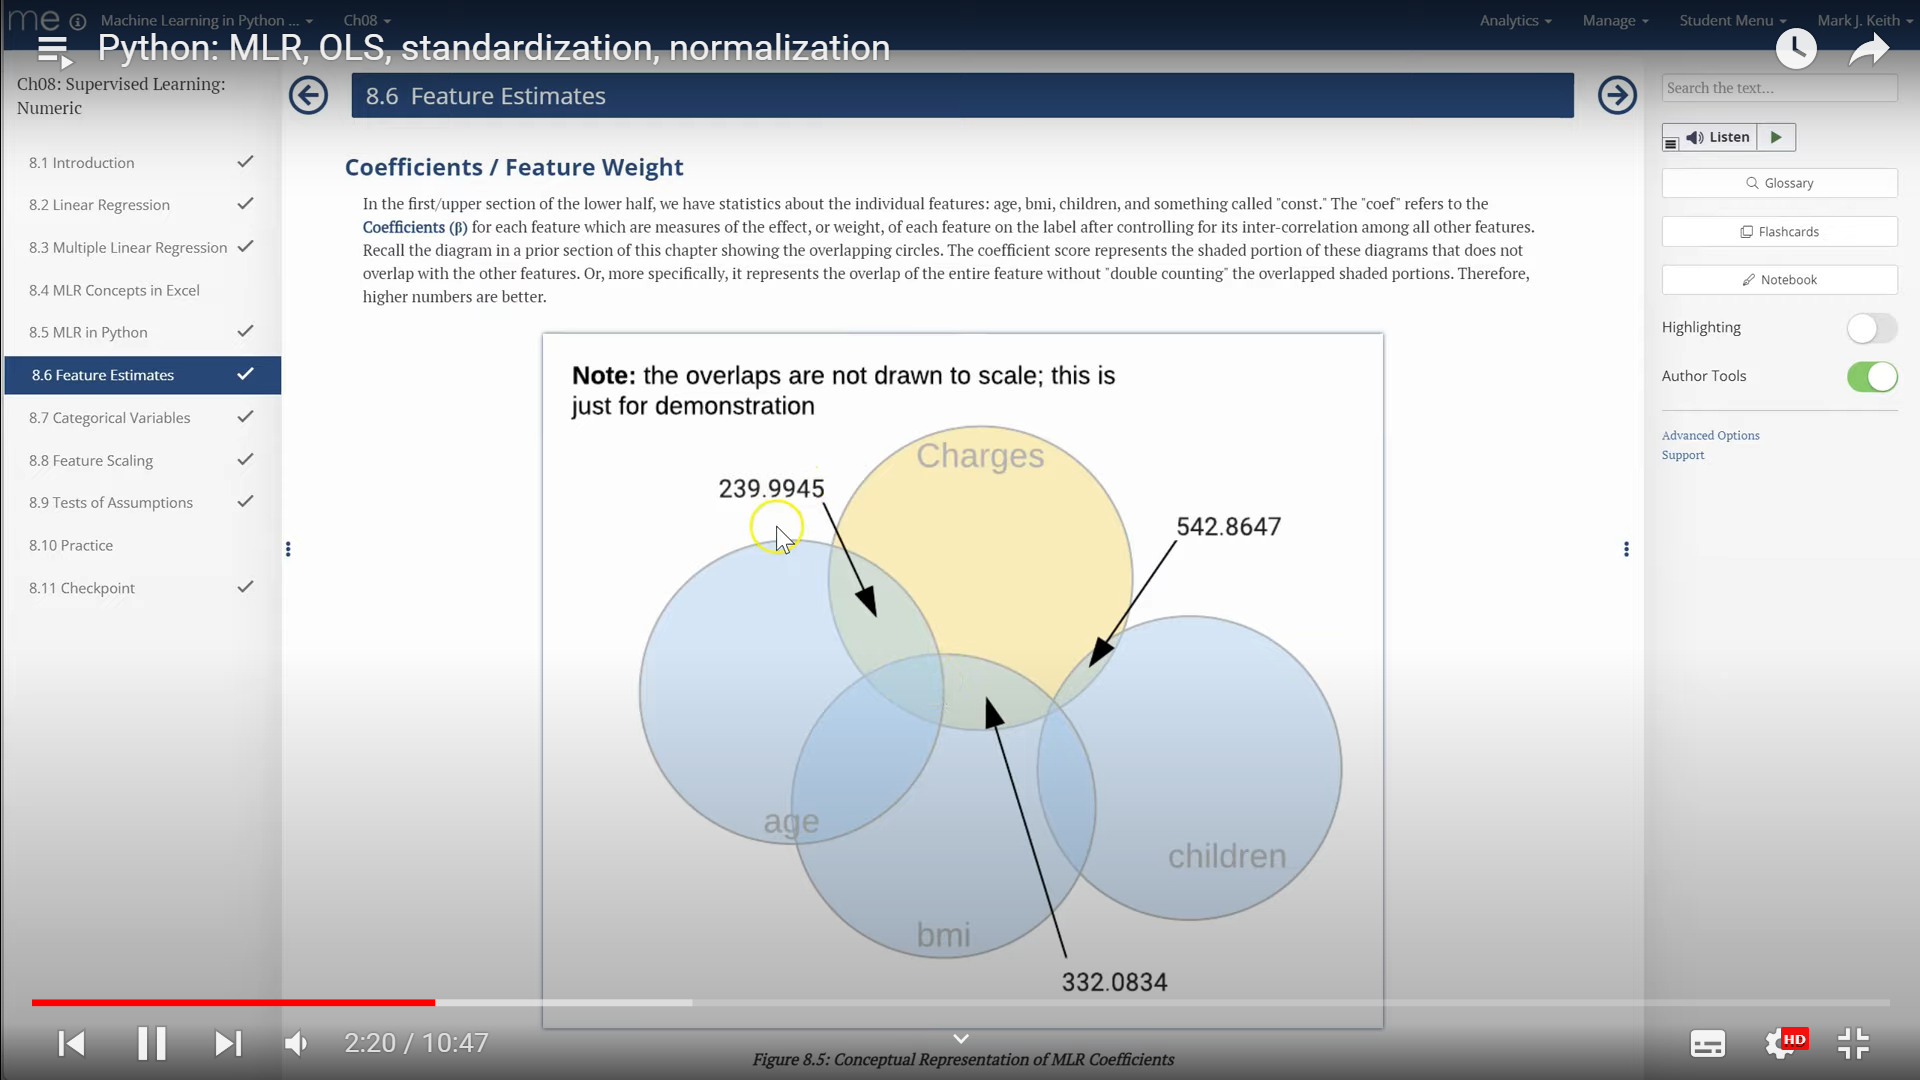

**data preprocessiong**

In [ ]:
from sklearn import preprocessing

df_zscore=pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns=df.columns)
df_zscore.head()

,age,bmi,children,charges,predictions,_male,_yes,_northwest,_southeast,_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.146163,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,-0.936300,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,-0.625683,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,-0.907108,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.731926,0.989591,-0.507463,1.765481,-0.611324,-0.566418


# **z score**

In [ ]:
y=df_zscore.charges
x=df_zscore.drop(columns=['predictions','charges']).assign(const=1)
results=sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:39:23   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2980      0.014     21.587      0.0

## **find MinMax scale**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_MinMax=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df),columns=df.columns)
df_MinMax.head()

,age,bmi,children,charges,predictions,_male,_yes,_northwest,_southeast,_southwest
0,0.021739,0.321227,0.0,0.251611,0.637464,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.127870,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.203881,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.135014,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.177882,1.0,0.0,1.0,0.0,0.0


## **multicoliniarity ==>vif (variance inflation factors = 1/(1-R2)**

In [ ]:
#vif= variance infaltion factors=1/(1-r2)

def vif (df):
  import pandas as pd 
  from sklearn.linear_model import LinearRegression

  #initializing dictionaries
  vif_dict,tolerance_dict={},{}

#from input data for each exogenous variable

  for col in df.drop(columns=['const']):
    y=df[col]
    x=df.drop(columns=[col])

  #extract r_squared from the fit
    r_squared=LinearRegression().fit(x,y).score(x,y)

  # calculate VIF
    if  r_squared<1: #prevent devision by zero runtime error
        vif=1/(1-r_squared)

    else:
        vif=1
    vif_dict[col]=vif

  #calculate tolerance
    tolerance=1-r_squared
    tolerance_dict[col]=tolerance

  #generate the DataFrame to return
    df_output=pd.DataFrame({'VIF': vif_dict,'Tolerance':tolerance_dict})
  return df_output.sort_values(by=['VIF'],ascending=False)
vif(x)


,VIF,Tolerance
_southeast,1.652230,0.605243
_southwest,1.529411,0.653846
_northwest,1.518823,0.658405
bmi,1.106630,0.903645
age,1.016822,0.983456
_yes,1.012074,0.988070
_male,1.008900,0.991178
children,1.004011,0.996005
